In [6]:
!pip install clean-text

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [7]:
import pandas as pd
from cleantext import clean # pip install clean-text
import re
import string

def clean_description(text):
    text = str(text)
    text = re.sub("', '", '.', text)
    text = re.sub('", "', '.', text)
    text = re.sub("[\[\]\']", '', text)
    
    return text

def clean_name(text):
    '''clean job title'''
    text = text.lower()
    return text

def clean_company(text):
    '''clean company name'''
    text = str(text)
    text = text.lower()
    text = text.translate(str.maketrans('', '', string.punctuation))
    text = text.replace(' ', '')
    return text

def clean_salary_min(text):
    '''get minimum salary'''
    min_sal= ''
    if type(text) == str:
        text_ls = text
        match = re.match(r"\$(?P<min_sal>\d+)k-\$(?P<max_sal>\d+)k", text)
        if match:
            min_sal = int(match.group('min_sal'))
    return min_sal

def clean_salary_max(text):
    '''get maximum salary'''
    max_sal = ''
    if type(text) == str:
        text_ls = text
        match = re.match(r"\$(?P<min_sal>\d+)k-\$(?P<max_sal>\d+)k", text)
        if match:
            max_sal = int(match.group('max_sal'))
    return max_sal


statesdic = {
        'AK': 'Alaska',
        'AL': 'Alabama',
        'AR': 'Arkansas',
        'AS': 'American Samoa',
        'AZ': 'Arizona',
        'CA': 'California',
        'CO': 'Colorado',
        'CT': 'Connecticut',
        'DC': 'District of Columbia',
        'DE': 'Delaware',
        'FL': 'Florida',
        'GA': 'Georgia',
        'GU': 'Guam',
        'HI': 'Hawaii',
        'IA': 'Iowa',
        'ID': 'Idaho',
        'IL': 'Illinois',
        'IN': 'Indiana',
        'KS': 'Kansas',
        'KY': 'Kentucky',
        'LA': 'Louisiana',
        'MA': 'Massachusetts',
        'MD': 'Maryland',
        'ME': 'Maine',
        'MI': 'Michigan',
        'MN': 'Minnesota',
        'MO': 'Missouri',
        'MP': 'Northern Mariana Islands',
        'MS': 'Mississippi',
        'MT': 'Montana',
        'NA': 'National',
        'NC': 'North Carolina',
        'ND': 'North Dakota',
        'NE': 'Nebraska',
        'NH': 'New Hampshire',
        'NJ': 'New Jersey',
        'NM': 'New Mexico',
        'NV': 'Nevada',
        'NY': 'New York',
        'OH': 'Ohio',
        'OK': 'Oklahoma',
        'OR': 'Oregon',
        'PA': 'Pennsylvania',
        'PR': 'Puerto Rico',
        'RI': 'Rhode Island',
        'SC': 'South Carolina',
        'SD': 'South Dakota',
        'TN': 'Tennessee',
        'TX': 'Texas',
        'UT': 'Utah',
        'VA': 'Virginia',
        'VI': 'Virgin Islands',
        'VT': 'Vermont',
        'WA': 'Washington',
        'WI': 'Wisconsin',
        'WV': 'West Virginia',
        'WY': 'Wyoming'}

statesdic_reverse = {v:k for (k,v) in statesdic.items()}

def clean_location(text):
    try:
        text_split = text.split(', ')
        if len(text_split) > 2:
            # replace the state by the short form(this is for linkedin)
            text_split = text_split[:2]
            if len(text_split[1]) > 2:
                text_split[1] = statesdic_reverse[text_split[1]]
            return ', '.join(text_split)
        elif len(text_split[1]) > 2:
            # match the pattern (this is for indeed)
            match = re.match(r"(?P<state>\w+)", text_split[1])
            text_split[1] = match.group('state')
            return ', '.join(text_split)
        return text
    except:
        return text
    
def clean_text(text):
    '''
    cleaning the text for the part of speech tagging
    input a string, return a string
    '''
    text = text.lower()

    text = re.sub(r"[()<>/]", ', ', text) # sub ()<>&/ to comma and space
    text = re.sub(r"&", 'and', text) # sub ()<>&/ to comma and space
    text = re.sub(r"[?!]", '. ', text) # sub ?! to dot and space

    text = re.sub(" [a-z0-9]+[\.'\-a-z0-9_]*[a-z0-9]+@\w+\.com", "", text) # sub email address to dot
    text = re.sub('[#"\']', '', text) # remove '#'

    text = re.sub("e\.g\.", '', text) # remove the 'e.g.'
    text = re.sub("it’s", 'it is', text)
    text = re.sub("we’re", 'we are', text)
    text = re.sub("[\t\n\r\f\v]+", ". ", text) # remove \n and \r

    text = re.sub(r'(?<=[.,])(?=[^\s])', r' ', text) # add space after comma and dot


    text = re.sub('\W+\.', '.', text) # remove the empty space before a dot
    text = re.sub('\W+\,', ',', text) # remove the empty space before a comma
    text = re.sub('[,\.]+\.+', '.', text) # sub multiple dots to one dot
    text = re.sub(' +',' ',text) # replace multiple whitespace by one whitespace

    return text

In [5]:
!pip install clean-text

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


/usr/local/lib/python3.7/dist-packages/spacy/language.py:1899: UserWarning: [W123] Argument disable with value [] is used instead of ['senter'] as specified in the config. Be aware that this might affect other components in your pipeline.
  config_value=config["nlp"][key],


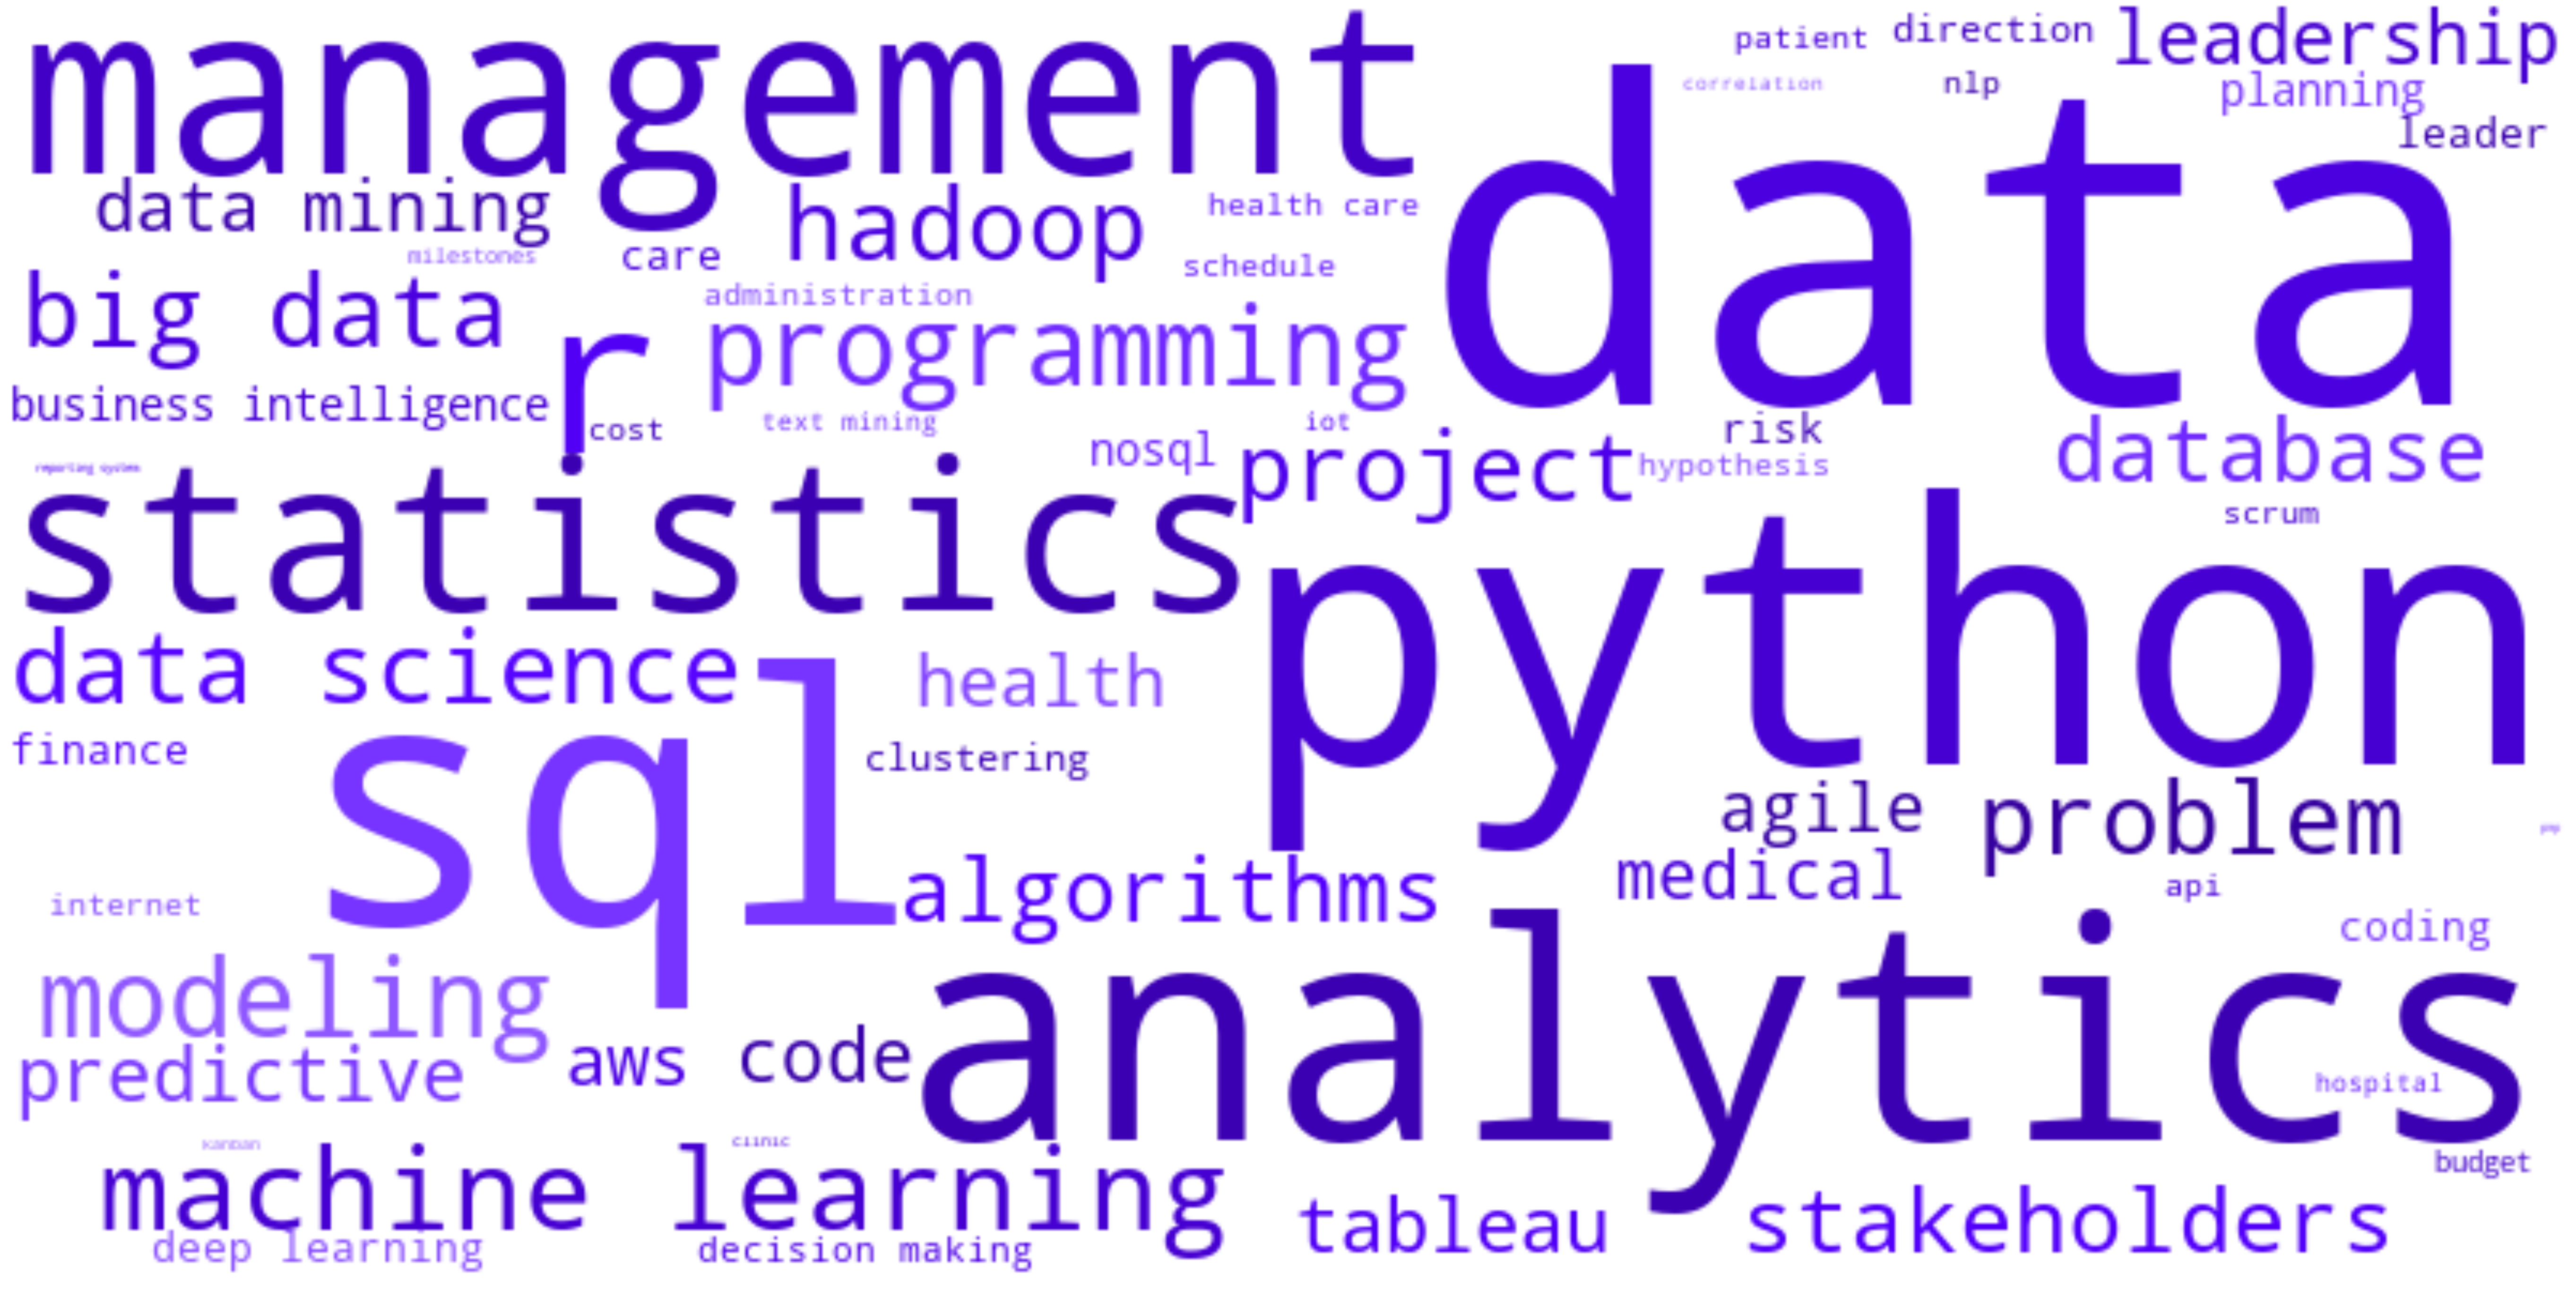

In [12]:
import spacy
import pandas as pd
import re
import csv
import en_core_web_sm
nlp = en_core_web_sm.load()
from spacy.matcher import PhraseMatcher
from collections import Counter
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
import csv
import numpy as np


keyword_dict = pd.read_csv('/content/drive/MyDrive/skills_corpous.csv')
IT_words = [nlp(text) for text in keyword_dict['Computer and Information Technology skills'].dropna(axis = 0)]
stats_words = [nlp(text) for text in keyword_dict['Statistics and Mathematics skills'].dropna(axis = 0)]
Management_words = [nlp(text) for text in keyword_dict['Project management'].dropna(axis = 0)]
ML_words = [nlp(text) for text in keyword_dict['AI & Data analytics'].dropna(axis = 0)]
health_words = [nlp(text) for text in keyword_dict['Healthcare'].dropna(axis = 0)]
Business = [nlp(text) for text in keyword_dict['Organization and Leadership Skills'].dropna(axis = 0)]



matcher = PhraseMatcher(nlp.vocab)
matcher.add('IT', None, *IT_words)
matcher.add('Stats', None, *stats_words)
matcher.add('mgmt', None, *Management_words)
matcher.add('ML', None, *ML_words)
matcher.add('health', None, *health_words)
matcher.add('Biz', None, *Business)



def extract_entities(text):
    d = [] 
    text = str(text)
    text = clean_text(text)
    doc = nlp(text)
    matches = matcher(doc)
    for match_id, start, end in matches:
        rule_id = nlp.vocab.strings[match_id]  # get the unicode ID, i.e. 'COLOR'
        span = doc[start : end]  # get the matched slice of the doc
        d.append((rule_id, span.text))
    return [i[1] for i,j in Counter(d).items()]

def clean_entity(text):
    text = re.sub('^\W+', '', text)
    text = re.sub('\W+$', '', text)
    text = re.sub(r'[^\x00-\x7F]+','', text)
    return text
        
        
if __name__ == '__main__':
    # read file
    keyword = "ds"
    df = pd.read_csv("/content/drive/MyDrive/indeed_job_dataset.csv".format(keyword))
    descriptions = df['Description'].values
    
    # extract entities in the file
    entities = []
    for text in descriptions:
        for x in extract_entities(text):
            entities.append(x)
    word_could_dict=Counter(entities)
    
    # write the top skills to csv file
    with open('/content/drive/MyDrive/data/{}_top_skills.csv'.format(keyword),'w') as csvfile:
        fieldnames=['Skill', 'Count', 'Percentage']
        writer=csv.writer(csvfile)
        writer.writerow(fieldnames)
        word_could_dict_sort = word_could_dict.most_common()
        n = len(df)
        for key, value in word_could_dict_sort:
            writer.writerow([key] + [value] + [value / n]) 

    
    # generate the word cloud
    def purple_color_func(word, font_size, position,orientation,random_state=None, **kwargs):
        return("hsl(260,100%%, %d%%)" % np.random.randint(30, 70))
    
    wordcloud = WordCloud(width=800, 
                          height=400, 
                          max_words=100,
                          prefer_horizontal=1, 
                          background_color="white").generate_from_frequencies(word_could_dict)
    #change the color setting
    wordcloud.recolor(color_func = purple_color_func)
    
    plt.figure(figsize=(100,50))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.savefig('/content/drive/MyDrive/data/{}_wordcloud.png'.format(keyword))
    
    